# K-means algorithm
**K-means is an unsupervised machine learning algorithm that is used for clustering. It is a method for finding clusters of observations in a dataset, with the goal of partitioning the observations into groups (also known as clusters) such that observations within the same group are more similar to each other than observations in other groups.**

# Data scalling
There are several algorithms that can be used to scale data in Python. The choice of algorithm depends on the nature of the data and the requirements of the problem.

Two common algorithms for scaling data are min-max scaling and standardization.

* Min-max scaling: Min-max scaling scales the data to a fixed range, usually between 0 and 1. It is done by subtracting the minimum value from each data point and dividing the result by the range (i.e., the difference between the maximum and minimum values). This can be useful when the data has a skewed distribution and the outliers have a significant impact on the results.

* Standardization: Standardization scales the data to have a mean of 0 and a standard deviation of 1. It is done by subtracting the mean from each data point and dividing the result by the standard deviation. This can be useful when the data follows a Gaussian distribution and the outliers do not have a significant impact on the results.



In [169]:
# libs and data import
import numpy as np
import random
import matplotlib.pyplot as plt
import pprint as pp
from matplotlib.colors import ListedColormap
import pandas as pd
# Load data from a file into a numpy array
data = np.loadtxt('http://cs.joensuu.fi/sipu/datasets/s1.txt')
pp.pprint(data)
x_train = np.array(data[:, :1 ]).reshape(1, len(data))
y_train = np.array(data[:, 1:2 ]).reshape(1, len(data))

array([[664159., 550946.],
       [665845., 557965.],
       [597173., 575538.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])


In [173]:
#@title KMeans class
# KMeans class
class KMeans:
  # Constructor
  def __init__(self, data, k = 2, max_iters = 100):
    self.__data = np.array(data)
    self.__k = k
    self.__max_iters = max_iters
    self.__points = np.array(data)
    self.__clusters = np.zeros(len(data))
    self.__centroids = None
    self.__nbrFeatures = len(self.getFeatures())
    print("Number of features: ", self.__nbrFeatures)
  # def getMinFeatures() : returns the Minimum values of the features
  def getMinFeatures(self):
    return self.__points.min(axis = 0)

  # def getMaxFeatures() : returns the Maximum values of the features
  def getMaxFeatures(self):
    return self.__points.max(axis = 0)

  # get distance between points
  def distance(v1, v2):
    #v1 and v2 should have the same length
    if len(v1) == len(v2):
      return np.linalg.norm(v1-v2)
    else:
      return None

  # Min_Max scaler
  def scaleData(self):
    min = self.getMinFeatures()
    max = self.getMaxFeatures()
    diff = max - min
    # Substruct min from our data
    self.__points = self.__points - min
    # Divide the result by the diff = max - min
    self.__points = self.__points / diff
    return self.__points

  # getFeatures() : return data features
  def getFeatures(self):
    return self.__points.T

  # initCentroids() : initialize centroids
  def initCentroids(self):
    self.__centroids = np.array(random.sample(list(self.__points), self.__k))
    return self.__centroids

  def updateCentroids(self):
    for i in range(1, self.__k + 1):
      pairs = zip(self.__clusters, self.__points)
      tmpList = list(filter(lambda pair : pair[0] == i, pairs))
      self.__centroids[i-1] = np.array([sum(list(map(lambda point : point[1][k], tmpList))) / len(tmpList) for k in range(self.__nbrFeatures)])

    # print(self.__centroids)
    return self.__centroids


  def getClusters(self):
    # Changes culsters of points
    counter = 0
    for point in self.__points:
      distances = np.array(list(map(lambda centroid : KMeans.distance(centroid, point), self.__centroids)))
      self.__clusters[counter] = distances.argmin() + 1
      counter += 1
    # Update centroids
    self.updateCentroids()

  # startKMeans()
  def startKMeans(self, k = None, iters = None):
    # To allows edit of number of clusters in each try
    tmpK = 0
    if k != None:
      tmpK = self.__k
      self.__k = k
    if iters == None:
      iters = self.__max_iters
    print("\nScaling the data ...")
    self.scaleData()
    print("\nInitializing the centroids ...")
    print(self.initCentroids())
    print(f"KMeans with {iters} iterations and {self.__k} cluster ...")
    print("\nGetting clusters ...")
    for i in range(iters):
      self.getClusters()
    # return back the old value of the number of clusters 
    if k != None:
      self.__k = tmpK

  def plot2DData(self):
    T = self.__data.T
    X, Y = T[0], T[1]
    plt.scatter(X, Y);

  def getPointsCloud(self):
    pointsCloud = []
    for k in range(1, self.__k + 1):
      pointsCloud.append(list(map(lambda pair : pair[1], list(filter(lambda pair : pair[0] == k, zip(self.__clusters, self.__data))))))
    pointsCloud = np.array(pointsCloud)
    return pointsCloud

  def plot2DData(self):
    points = self.__data.T
    x, y = points[0], points[1]
    plt.scatter(x, y, marker = 'x', c = 'r', label = 'Data')
    plt.title('Data plot')
    plt.xlabel('First feature of data')
    plt.ylabel('Second feature of data')
    plt.legend()
    plt.show()

  def plot2DClouds(self):
    pointsCloud = self.getPointsCloud()
    features = []
    counter = 0
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1b9e77', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']

    markers = ['x', 'o', 'A']
    for cloud in pointsCloud:
      features.append([])
      for k in range(self.__nbrFeatures):
        features[counter].append(list(map(lambda point : point[k], cloud))) 
      plt.scatter(features[counter][0], features[counter][1], marker = 'x', c = colors[counter], edgecolor = 'k', s= 20, label = f'Cluster {counter}')
      counter += 1
    plt.title('Clusters of data')
    plt.xlabel('First feature of data')
    plt.ylabel('Second feature of data')
    # plt.legend()
    plt.show()

  def __str__(self):
    return str(self.__points)

Number of features:  2

Scaling the data ...

Initializing the centroids ...
[[0.93323646 0.51642989]
 [0.85352971 0.74675822]
 [0.40523778 0.38398278]
 [0.16629693 0.32698408]
 [0.34720459 0.11054277]
 [0.17966684 0.30659229]
 [0.87091186 0.12373496]
 [0.81349855 0.26231168]
 [0.41897919 0.80057197]
 [0.17633816 0.33583215]
 [0.87087365 0.07370968]
 [0.83597455 0.12794859]]
KMeans with 100 iterations and 12 cluster ...

Getting clusters ...


<ipython-input-173-85049fc19c64>:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pointsCloud = np.array(pointsCloud)


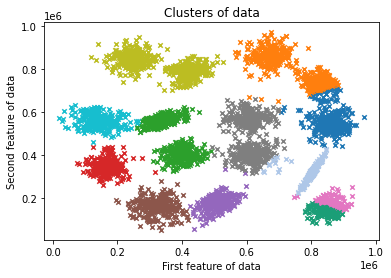

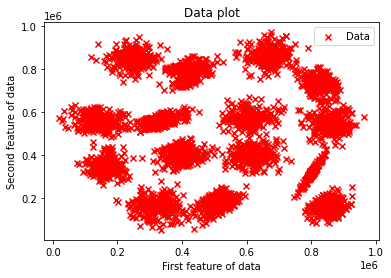

In [174]:
# @title KMeans class testing
kmeans = KMeans(data, 12, 100)
kmeans.startKMeans()
kmeans.plot2DClouds()
kmeans.plot2DData()

In [ ]:
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt
# Generate data for 3000 students
# np.random.seed(0)
data = np.random.rand(30000000, 5)

# Scale the data to the appropriate range
data[:, 0] = data[:, 0] * 20 # Spe
data[:, 1] = data[:, 1] * 20 # Other
data[:, 2] = data[:, 2] * 20 # Comm 
data[:, 3] = (data[:, 3] * 20) # Absence
data[:, 4] = data[:, 4] * 10 # social dim

# Create clusters
specialization_cluster = np.around(data[np.where((data[:, 0] > 14) & (data[:, 1] > 10) & (data[:, 1] > 12) & (data[:, 3] < 4) & (data[:, 4] > 5))], decimals = 0)
communication_cluster = np.around(data[np.where((data[:, 2] > 15) & (data[:, 2] > 14))], decimals = 0)
other = np.around(data[np.where((data[:, 1] > 15) & (data[:, 2] > 14) & (data[:, 3] < 8))], decimals = 0)
good_cluster = np.around(data[np.where((data[:, 0] > 14) & (data[:, 1] > 14) & (data[:, 2] > 14) & (data[:, 3] < 4) & (data[:, 4] > 5))], decimals = 0)
absent_cluster = np.around(data[np.where((data[:, 3] > 8) & (data[:, 4] < 5))], decimals = 0)
bad_cluster = np.around(data[np.where((data[:, 0] < 12) & (data[:, 1] < 12) & (data[:, 2] < 12) & (data[:, 3] > 8) & (data[:, 4] < 10))], decimals = 0)
#Print the generated clusters
pp.pprint(specialization_cluster)
pp.pprint(communication_cluster)
pp.pprint(good_cluster)
pp.pprint(other)
pp.pprint(absent_cluster)
data = np.concatenate((specialization_cluster, communication_cluster, good_cluster, other, absent_cluster), axis=0)



1000


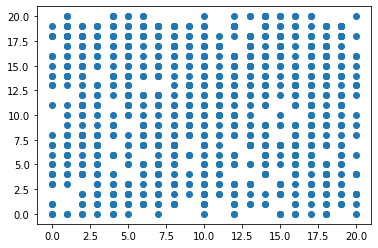

In [164]:
data = data[:10000]
np.random.shuffle(data)
print(len(data))
data = data.T
plt.scatter(data[0], data[1])